## Neural Network Training with 
1. Random Hill Climbing
2. Simulated Annealing
3. MIMIC (Mutual Information Maximizing Input Clustering)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
X = df.iloc[:,:-1]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
y = np.array(df.iloc[:, -1])

In [30]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Back-Propagation Algorithm

In [6]:
# Set the input shape
input_shape = (8,)

# Create the model
model = Sequential()
model.add(Dense(3, input_shape=input_shape, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 27        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Configure the model and start training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 300
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=1, validation_split=0.2)


Epoch 1/300
26/26 [==============================] - 1s 10ms/step - loss: 0.4904 - accuracy: 0.7567 - val_loss: 0.4742 - val_accuracy: 0.7961
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7591 - val_loss: 0.4757 - val_accuracy: 0.7864
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7591 - val_loss: 0.4749 - val_accuracy: 0.7864
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7591 - val_loss: 0.4746 - val_accuracy: 0.7864
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7567 - val_loss: 0.4742 - val_accuracy: 0.7961
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7591 - val_loss: 0.4744 - val_accuracy: 0.7864
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7567 - val_loss: 0.4756 - val_accuracy: 0.7767
Epoch 8/300


In [11]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')


8/8 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7795
Test results - Loss: 0.46815356612205505 - Accuracy: 0.7795275449752808%


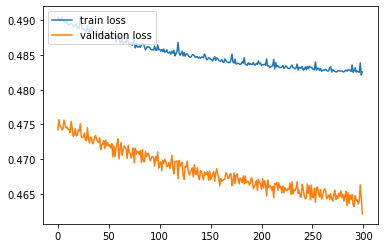

In [17]:
history = history.history
# visualizing losses and accuracy
train_loss = history['loss']
val_loss   = history['val_loss']
train_acc  = history['accuracy']
val_acc    = history['val_accuracy']
xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

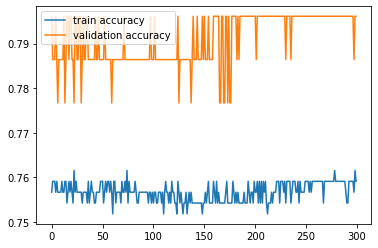

In [18]:
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')

### Randomized Hill Climbing

In [32]:
def relu(x):
  x[x<0] = 0
  return x

def sigmoid(x):
  return 1/(1+np.exp(-x))

class NeuralNet:
  def __init__(self):
    self.w1 = np.random.rand(3, 8)*20 - 10
    self.b1 = np.random.rand()*20 - 10
    self.w2 = np.random.rand(1, 3)*20 - 10
    self.b2 = np.random.rand()*20 - 10

  def forward(self, x):
    a1 = np.dot(self.w1, x) + self.b1
    # apply relu
    h1 = relu(a1)
    o1 = np.dot(self.w2, h1) + self.b2
    return sigmoid(o1)


In [64]:
def compute_avg_error(nn, X_train, y_train):
  total_error = 0
  for x, y in zip(X_train, y_train):
    pred = nn.forward(x)
    error = (y - pred)**2
    total_error += error[0]
  return total_error/len(y_train)

In [65]:
best_nn = NeuralNet()
best_err = compute_avg_error(best_nn, X_train, y_train)

In [66]:
num_epochs = 300
error_list = []
for i in range(num_epochs):
  nn = NeuralNet()
  err = compute_avg_error(nn, X_train, y_train)
  if err < best_err:
    best_nn = nn
    best_err = err
  
  error_list.append(best_err)

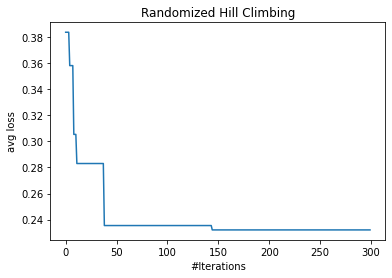

In [67]:
plt.plot(range(300), error_list)
plt.title('Randomized Hill Climbing')
plt.xlabel('#Iterations')
plt.ylabel('avg loss')
plt.show()

In [68]:
# Test accuracy
correct = 0
for x, y in zip(X_test, y_test):
  prob = best_nn.forward(x)
  pred = 1 if prob > 0.5 else 0
  if pred == y:
    correct += 1

print("Accuracy = %.3f%%"%(100*correct/len(y_test)))

Accuracy = 66.929%


### Simulated Annealing

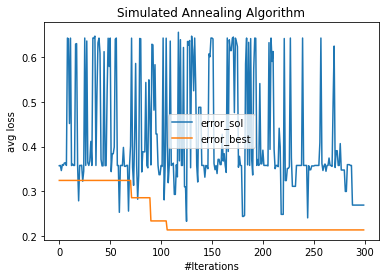

In [48]:
# Initialization
T0 = 0.95
Tf = 0.1
MaxIter = 300
Delta = (T0 - Tf)/MaxIter
T = T0

# Initial solution construction phase
# Generate an initial solution at random
best_nn = NeuralNet()
sol_nn = best_nn
best_err = compute_avg_error(best_nn, X_train, y_train)
sol_err = best_err

# keep a list of errors for plotting
err_list = []
best_err_list = []
# Improvement phase
for iteration in range(MaxIter):
    # generate a new solution by a swap neighbourhood structure
    nn = NeuralNet()
    err = compute_avg_error(nn, X_train, y_train)
    
    if err < sol_err:
        sol_nn = nn
        sol_err = err
        
        if err < best_err:
            best_nn = nn
            best_err = err

    else:
        c = (err - best_err)*10
        # generate a random number in [0,1]
        r = np.random.rand()
        if np.exp(-c/T) > r:
            sol_nn = nn
            sol_err = err
        
    # Update T
    T -= Delta
    
    # Add to the list for plotting
    err_list.append(sol_err)
    best_err_list.append(best_err)

plt.plot(range(MaxIter), error_list, label='error_sol')
plt.plot(range(MaxIter), best_err_list, label='error_best')
plt.xlabel('#Iterations')
plt.ylabel('avg loss')
plt.title('Simulated Annealing Algorithm')
plt.legend()
plt.show()



In [49]:
# Test accuracy
correct = 0
for x, y in zip(X_test, y_test):
  prob = best_nn.forward(x)
  pred = 1 if prob > 0.5 else 0
  if pred == y:
    correct += 1

print("Accuracy = %.3f%%"%(100*correct/len(y_test)))

Accuracy = 68.898%


### Genetic Algorithm

In [52]:
def crossover(nn1, nn2, a):
    '''
    combine two neural network parameters as a*w1 + (1-a)*w2
    '''
    nn = NeuralNet()
    nn.w1 = nn1.w1*a + nn2.w1*(1-a)
    nn.w2 = nn1.w2*a + nn2.w2*(1-a)
    nn.b1 = nn1.b1*a + nn2.b1*(1-a)
    nn.b2 = nn1.b2*a + nn2.b2*(1-a)
    return nn

def mutation(nn):
    '''
    multiply each parameter by a random number
    '''
    nn.w1 *= np.random.rand()*2 - 1
    nn.b1 *= np.random.rand()*2 - 1
    nn.w2 *= np.random.rand()*2 - 1
    nn.b2 *= np.random.rand()*2 - 1
    return nn

In [76]:
# We keep a population of 100 different parameters
N = 100
population = [NeuralNet() for i in range(N)]
fit = []
MaxIter = 100

for iteration in range(MaxIter):
    # Compute average error for each one of 100 
    errors = np.array([compute_avg_error(nn, X_train, y_train) for nn in population])
    fit.append(min(errors))
    
    # Pick top 20 with the least errors
    n = 20
    topn = [population[i] for i in range(N) if i in np.argsort(errors)[:n]]

    # Cross Over Operation: Arthmetic crossover (a*x + (1-a)*y)
    a = 0.5
    # we'll pick two vectors randomly 
    crossed = []
    for i in range(N-n):
        # sample 2 indices
        indices = np.random.choice(range(n), 2, replace=False)
        parent1 = topn[indices[0]]
        parent2 = topn[indices[1]]
        # crossover
        child = crossover(parent1, parent2, a)
        crossed.append(child)

    # Set the new population
    population = topn + crossed

    # Mutation; pick any one of the index and multiply by a number in [0, 2] for each parameter
    for k in range(len(population)):
        r = np.random.choice(len(population))
        population[r] = mutation(population[r])


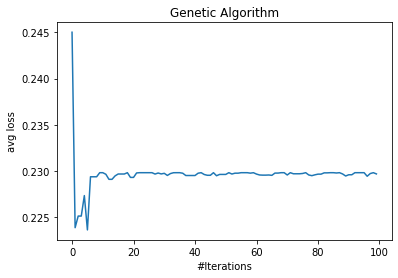

In [78]:
plt.plot(range(MaxIter), fit)
plt.xlabel('#Iterations')
plt.ylabel('avg loss')
plt.title('Genetic Algorithm')
plt.show()


In [82]:
best_nn = population[np.argsort(errors)[0]]
# Test accuracy
correct = 0
for x, y in zip(X_test, y_test):
    prob = best_nn.forward(x)
    pred = 1 if prob > 0.5 else 0
    if pred == y:
        correct += 1

print("Accuracy = %.3f%%"%(100*correct/len(y_test)))

Accuracy = 66.929%
